## What I understand about the challenge !

### this challenge is a supervised classification ml task and you have to use historical financial,demographic and performance data to predict whether or not an applicant will pay the loan. 

### * the goal is to train a model to learn to predict the labels from the features.

### * The label is a binary variable, 0 means will repay loan on time, 1  means will have difficulty repaying loan.

In [216]:
"""
importing all the necessary libraries I will need to data analysis. 
"""
import pandas as pd 
import numpy as np
import matplotlib.pyplot as  plt 
import seaborn as sns
from IPython.display import display

In [217]:
# Load the data

train_demographics = pd.read_csv('/home/abu/Documents/traindemographics.csv', parse_dates=['birthdate'])
test_demographics = pd.read_csv('/home/abu/Documents/testdemographics.csv', parse_dates=['birthdate'])
train_perf = pd.read_csv('/home/abu/Documents/trainperf.csv', parse_dates=['approveddate','creationdate'])
test_perf = pd.read_csv('/home/abu/Documents/testperf.csv',parse_dates=['approveddate','creationdate'])
train_prevloans= pd.read_csv('/home/abu/Documents/trainprevloans.csv', parse_dates=['approveddate','creationdate','closeddate','firstduedate','firstrepaiddate'])                                                                           
test_prevloans = pd.read_csv('/home/abu/Documents/testprevloans.csv', parse_dates=['approveddate','creationdate','closeddate','firstduedate','firstrepaiddate'])                                                                     

In [218]:
#Now I'm going to see what's inside each dataset 
# print the first 5 rows in each dataset


display("train demographics")
display(train_demographics.head(5))

display("test demographics")
display(test_demographics.head(5))


display("train performance")
display(train_perf.head(5))

display("test performance")
display(test_perf.head(5))


display("train previous loans")
display(train_prevloans.head(5))

display("test previous loans")
display(test_prevloans.head(5))


'train demographics'

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


'test demographics'

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN


'train performance'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good


'test performance'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN


'train previous loans'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


'test previous loans'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00,2016-05-17 09:36:55,10000.0,13000.0,30,2016-06-17 00:04:15,NaN,2016-06-16,2016-06-16 15:44:08
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59,2017-02-04 20:28:52,30000.0,36800.0,60,2017-03-02 16:22:58,NaN,2017-03-06,2017-03-02 16:07:47
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22,2017-03-04 09:28:16,30000.0,34400.0,30,2017-04-02 00:44:24,NaN,2017-04-03,2017-04-01 21:29:46
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14,2016-06-02 13:27:08,10000.0,13000.0,30,2016-07-04 11:34:04,NaN,2016-07-04,2016-07-04 11:19:01
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12,2016-05-16 08:13:04,10000.0,11500.0,15,2016-06-02 00:02:58,NaN,2016-05-31,2016-06-01 15:22:34


In [219]:
# Data Preparation

train_demographics['set'] = 'train'
test_demographics['set'] = 'test'
train_perf['set'] = 'train'
test_perf['set'] = 'test'
train_prevloans['set'] = 'train'
test_prevloans['set'] = 'test'


# merge datasets

demographics_data=pd.concat([train_demographics,test_demographics])
performance_data=pd.concat([train_perf,test_perf])
previous_data=pd.concat([train_prevloans,test_prevloans])

/home/abu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


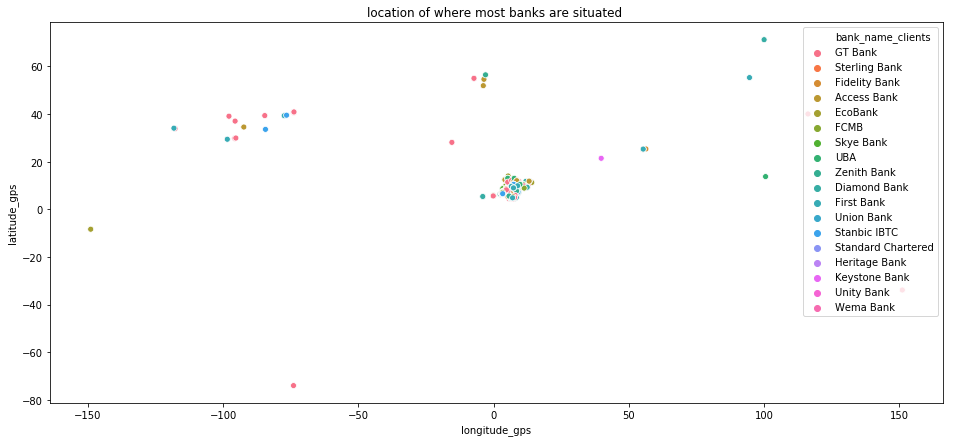

In [220]:
plt.figure(figsize=(16,7))
sns.scatterplot(x="longitude_gps", y="latitude_gps",hue="bank_name_clients",data=demographics_data)
plt.title("location of where most banks are situated ")
plt.legend()

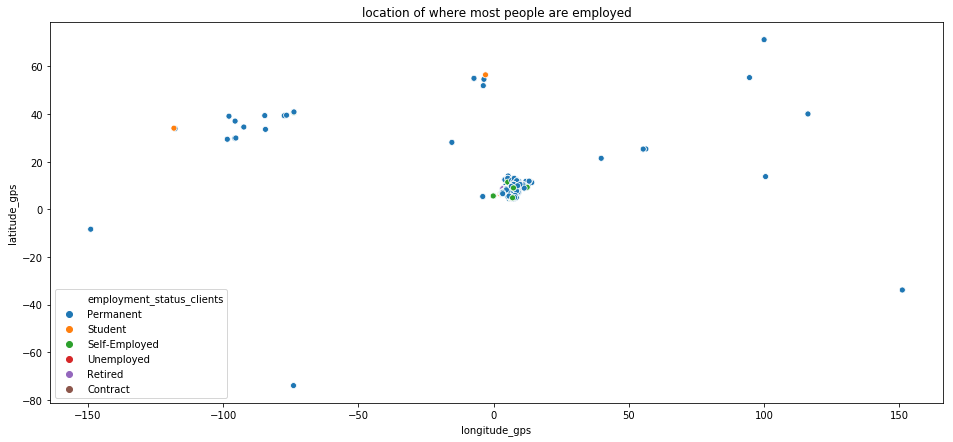

In [221]:
plt.figure(figsize=(16,7))
sns.scatterplot(x="longitude_gps", y="latitude_gps",hue="employment_status_clients",data=demographics_data)
plt.title("location of where most people are employed")
plt.legend()


#### FInd it strange that where there is high number of banks, there are more people employed. Is that the city ? I think its more or less on the center of nigeria, Abuja the capital City. 

In [222]:
#Create the Target Variable
# Convert the good_bad_flag into numerical binary variable 
target = {'Good':1,'Bad':0}
performance_data.good_bad_flag =performance_data.good_bad_flag.map(target)

In [223]:
performance_data.head()

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,set,systemloanid,termdays,totaldue
0,2017-07-25 08:22:56,2017-07-25 07:22:47,8a2a81a74ce8c05d014cfb32a0da1049,1.0,30000.0,12,NaN,train,301994762,30,34500.0
1,2017-07-05 17:04:41,2017-07-05 16:04:18,8a85886e54beabf90154c0a29ae757c0,1.0,15000.0,2,NaN,train,301965204,30,17250.0
2,2017-07-06 14:52:57,2017-07-06 13:52:51,8a8588f35438fe12015444567666018e,1.0,20000.0,7,NaN,train,301966580,15,22250.0
3,2017-07-27 19:00:41,2017-07-27 18:00:35,8a85890754145ace015429211b513e16,1.0,10000.0,3,NaN,train,301999343,15,11500.0
4,2017-07-03 23:42:45,2017-07-03 22:42:39,8a858970548359cc0154883481981866,1.0,40000.0,9,NaN,train,301962360,30,44000.0


/home/abu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


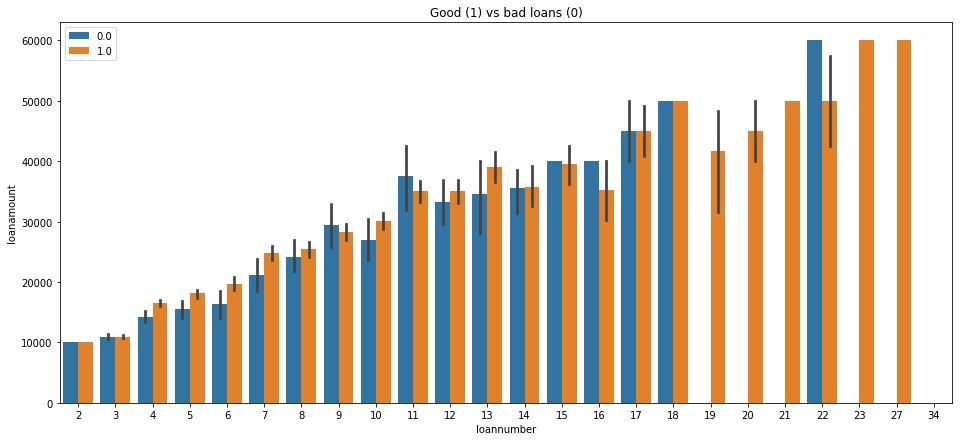

In [224]:
plt.figure(figsize=(16,7))
plt.title("Good (1) vs bad loans (0)")

sns.barplot(x="loannumber", y="loanamount", hue="good_bad_flag",data=performance_data)
plt.legend()

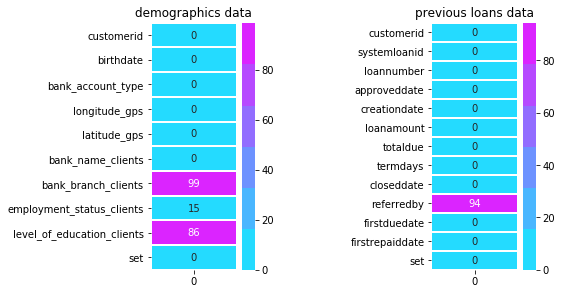

In [225]:
# lets perform feature engineering
# but lets see missing values in dataset

plt.figure(figsize=(12,10))


# demographics data
plt.subplot(231)
sns.heatmap(pd.DataFrame(demographics_data.isnull().sum()/demographics_data.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("demographics data")


# previous loan data
plt.subplot(232)
sns.heatmap(pd.DataFrame(previous_data.isnull().sum()/previous_data.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("previous loans data")

plt.subplots_adjust(wspace = 1.6)

In [226]:
# Isn't it important for banks to have a clients level of education, I would tell the client to try and reduce this number 

# Feature Engineering 

In [227]:

"""
demographics_data=pd.concat([train_demographics,test_demographics])
performance_data=pd.concat([train_perf,test_perf])
previous_data=pd.concat([train_prevloans,test_prevloans])

all of these dataframes contain the data and all will be feature engineered to be fed into the model. 
"""

demographics_data.head() # description about the client

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,set
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,train
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,train
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,train
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,train
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,train


In [228]:
demographics_data.drop_duplicates(subset=demographics_data.columns,keep='last', inplace=True) # drops duplicates

#create new column
demographics_data['Age']=2019-demographics_data.birthdate.dt.year

demographics_data["bank_account_type"] = demographics_data["bank_account_type"].replace("Current", "Other")

demographics_data["Age"].head()

0    46
1    33
2    32
3    28
4    37
Name: Age, dtype: int64

In [229]:
previous_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,set
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43,train
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00,train
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47,train
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43,train
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35,train


In [230]:
# profit the banks make
previous_data['profit']=previous_data['totaldue'] -previous_data['loanamount']

# this is the return days
previous_data['return_days']=previous_data.closeddate-previous_data.approveddate
previous_data['return_days']=previous_data['return_days'].apply(lambda x:int(str(x)[:2]))

#days left
previous_data['days_left']=previous_data.termdays-previous_data.return_days

In [231]:
# features extracted 


#Totalprofit
Totalprofit=previous_data.pivot_table(values='profit',index='customerid',aggfunc=sum)
Totalprofit.rename(columns={'profit':'Totalprofit'},inplace=True)

#Avgprofit
Avgprofit=previous_data.pivot_table(values='profit',index='customerid',aggfunc=np.mean)
Avgprofit.rename(columns={'profit':'Avgprofit'},inplace=True)

#Avgloanamount
Avgloanamount=previous_data.pivot_table(values='loanamount',index='customerid',aggfunc=np.mean)
Avgloanamount.rename(columns={'loanamount':'Avgloanamount'},inplace=True)

#Avgtermdays
Avgtermdays=previous_data.pivot_table(values='termdays',index='customerid',aggfunc=np.mean)
Avgtermdays.rename(columns={'termdays':'Avgtermdays'},inplace=True)

#earlypayment
earlypayment=previous_data.pivot_table(values='days_left',index='customerid',aggfunc=lambda x:(x>=0).sum())
earlypayment.rename(columns={'days_left':'earlypayment'},inplace=True)

#Avgdaysleft
Avgdaysleft=previous_data.pivot_table(values='days_left',index='customerid',aggfunc=np.mean)
Avgdaysleft.rename(columns={'days_left':'Avgdaysleft'},inplace=True)


loan_data=[Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment]
loan_data=loan_data[0].join(loan_data[1:])

In [232]:
# Now going to work performance 

performance_data.head()

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,set,systemloanid,termdays,totaldue
0,2017-07-25 08:22:56,2017-07-25 07:22:47,8a2a81a74ce8c05d014cfb32a0da1049,1.0,30000.0,12,NaN,train,301994762,30,34500.0
1,2017-07-05 17:04:41,2017-07-05 16:04:18,8a85886e54beabf90154c0a29ae757c0,1.0,15000.0,2,NaN,train,301965204,30,17250.0
2,2017-07-06 14:52:57,2017-07-06 13:52:51,8a8588f35438fe12015444567666018e,1.0,20000.0,7,NaN,train,301966580,15,22250.0
3,2017-07-27 19:00:41,2017-07-27 18:00:35,8a85890754145ace015429211b513e16,1.0,10000.0,3,NaN,train,301999343,15,11500.0
4,2017-07-03 23:42:45,2017-07-03 22:42:39,8a858970548359cc0154883481981866,1.0,40000.0,9,NaN,train,301962360,30,44000.0


In [233]:
performance_data['new_profit']=performance_data['totaldue']-performance_data['loanamount'] # synthetic feature

In [234]:
performance_data.drop(columns=['systemloanid','referredby','creationdate','approveddate','totaldue'],inplace=True)

In [235]:
performance_data.head()

,customerid,good_bad_flag,loanamount,loannumber,set,termdays,new_profit
0,8a2a81a74ce8c05d014cfb32a0da1049,1.0,30000.0,12,train,30,4500.0
1,8a85886e54beabf90154c0a29ae757c0,1.0,15000.0,2,train,30,2250.0
2,8a8588f35438fe12015444567666018e,1.0,20000.0,7,train,15,2250.0
3,8a85890754145ace015429211b513e16,1.0,10000.0,3,train,15,1500.0
4,8a858970548359cc0154883481981866,1.0,40000.0,9,train,30,4000.0


In [237]:
featured_data = pd.merge(loan_data.reset_index(),performance_data,how='outer',on='customerid')

In [238]:
featured_data.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,good_bad_flag,loanamount,loannumber,set,termdays,new_profit
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,0.0,10000.0,2,train,15,1500.0
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,1.0,30000.0,5,train,60,9000.0
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,1.0,20000.0,8,train,30,4500.0
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,1.0,30000.0,9,train,60,9000.0
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,1.0,10000.0,3,train,15,1500.0


In [239]:
# more feature engineering
# creating more synthetic features

featured_data['loanamountdeviation']=featured_data.Avgloanamount-featured_data.loanamount
featured_data['profitdeviation']=featured_data.Avgprofit-featured_data.new_profit
featured_data['termdaysdeviation']=featured_data.Avgtermdays-featured_data.termdays

In [240]:

featured_data.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,good_bad_flag,loanamount,loannumber,set,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,0.0,10000.0,2,train,15,1500.0,0.000000,0.000000,0.000000
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,1.0,30000.0,5,train,60,9000.0,-12500.000000,-4125.000000,-22.500000
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,1.0,20000.0,8,train,30,4500.0,-7142.857143,-2142.857143,-10.714286
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,1.0,30000.0,9,train,60,9000.0,-13750.000000,-4950.000000,-26.250000
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,1.0,10000.0,3,train,15,1500.0,0.000000,750.000000,7.500000


In [241]:
# merge this featured data with demographic data to feed model
new_featured_data = pd.merge(featured_data,demographics_data,how='inner',on='customerid')
new_featured_data.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,good_bad_flag,loanamount,loannumber,...,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,set_y,Age
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,0.0,10000.0,2,...,1989-11-09,Savings,3.351667,6.657019,GT Bank,OJUELEGBA,Permanent,Primary,train,30
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,1.0,30000.0,5,...,1979-10-18,Other,3.395230,6.592191,Standard Chartered,NaN,Permanent,Graduate,train,40
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,1.0,20000.0,8,...,1979-01-29,Savings,3.306388,6.651843,GT Bank,MUSHIN BRANCH,Permanent,Graduate,train,40
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,1.0,30000.0,9,...,1978-11-25,Savings,3.426698,6.423048,First Bank,"17, SANUSI FAFUNWA STREET, VICTORIA ISLAND, LAGOS",Permanent,Secondary,train,41
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,1.0,10000.0,3,...,1978-04-07,Savings,6.976132,4.801001,GT Bank,"AKUTE,LAGOS.",Permanent,Secondary,test,41


In [242]:
#drop columns I dont need 
new_featured_data.drop(columns=['set_x','set_y','bank_branch_clients','bank_name_clients',"birthdate"],inplace=True)

In [243]:
new_featured_data.shape

(5818, 21)

In [244]:
new_featured_data.columns

Index(['customerid', 'Totalprofit', 'Avgprofit', 'Avgloanamount',
       'Avgtermdays', 'Avgdaysleft', 'earlypayment', 'good_bad_flag',
       'loanamount', 'loannumber', 'termdays', 'new_profit',
       'loanamountdeviation', 'profitdeviation', 'termdaysdeviation',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'employment_status_clients', 'level_of_education_clients', 'Age'],
      dtype='object')

#### Encoding the categorical variables

In [245]:

new_featured_data.fillna(0, inplace=True)



from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

new_featured_data["bank_account_type"] = encode.fit_transform(new_featured_data['bank_account_type'])


# Numeric encoding
new_featured_data["level_of_education_clients"] = new_featured_data["level_of_education_clients"].map({"Primary":1,
                                                                                                       "Graduate":2,
                                                                                                       "Secondary":3,
                                                                                                       "Post-Graduate":4})


new_featured_data["employment_status_clients"] = new_featured_data["employment_status_clients"].map({"Permanent":1,
                                                                                                       "Student":2,
                                                                                                       "Self-Employed":3})

In [246]:
# fill in nan
new_featured_data.fillna(0, inplace=True)


In [247]:
new_featured_data.head(6)

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,good_bad_flag,loanamount,loannumber,...,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,bank_account_type,longitude_gps,latitude_gps,employment_status_clients,level_of_education_clients,Age
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,0.0,10000.0,2,...,1500.0,0.000000,0.000000,0.000000,1,3.351667,6.657019,1.0,1.0,30
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,1.0,30000.0,5,...,9000.0,-12500.000000,-4125.000000,-22.500000,0,3.395230,6.592191,1.0,2.0,40
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,1.0,20000.0,8,...,4500.0,-7142.857143,-2142.857143,-10.714286,1,3.306388,6.651843,1.0,2.0,40
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,1.0,30000.0,9,...,9000.0,-13750.000000,-4950.000000,-26.250000,1,3.426698,6.423048,1.0,3.0,41
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,1.0,10000.0,3,...,1500.0,0.000000,750.000000,7.500000,1,6.976132,4.801001,1.0,3.0,41
5,8a26bd845089f1d7015090b1d6f53bad,27050.0,3005.555556,13333.333333,26.666667,-4.00,5.0,1.0,20000.0,10,...,4500.0,-6666.666667,-1494.444444,-3.333333,0,3.486608,6.622080,1.0,0.0,32


# Modeling

### Use a number of models to get the best one



In [332]:
#  split the data and measuring accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


# Our Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [333]:

Xtraining_features = new_featured_data.drop(["customerid","good_bad_flag"],axis=1)  #these will be my features

y_label = new_featured_data["good_bad_flag"]

In [334]:
Xtraining_features.head()

,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loanamount,loannumber,termdays,new_profit,loanamountdeviation,profitdeviation,termdaysdeviation,bank_account_type,longitude_gps,latitude_gps,employment_status_clients,level_of_education_clients,Age
0,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,10000.0,2,15,1500.0,0.000000,0.000000,0.000000,1,3.351667,6.657019,1.0,1.0,30
1,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,30000.0,5,60,9000.0,-12500.000000,-4125.000000,-22.500000,0,3.395230,6.592191,1.0,2.0,40
2,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,20000.0,8,30,4500.0,-7142.857143,-2142.857143,-10.714286,1,3.306388,6.651843,1.0,2.0,40
3,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,30000.0,9,60,9000.0,-13750.000000,-4950.000000,-26.250000,1,3.426698,6.423048,1.0,3.0,41
4,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,10000.0,3,15,1500.0,0.000000,750.000000,7.500000,1,6.976132,4.801001,1.0,3.0,41


In [335]:
#split the training and test data
X_train, X_test, y_train, y_test = train_test_split(Xtraining_features, y_label,stratify=y_label,test_size=0.33, random_state=0)

In [336]:
#create a function that gets a model, measures accuracy and confusion matrix

#confusion matrix is showing the frequency of misclassifications by our model

In [337]:
def get_model(model,train_X,train_y,test_X,test_y):
    """
    gets a model, for example a RandomForest or a XGBoost etc
    performs training
    measures accuracy 
    shows the confusion matrix
    """
    
    model.fit(train_X,train_y)
    predictions = model.predict(test_X)
    print(model)
    
    print("Accuracy score : ", accuracy_score(predictions,test_y))
    print("mae score : ", mean_absolute_error(predictions,test_y))
    print("Recall score   : ", recall_score(predictions,test_y))
    print("classification report :\n",classification_report(predictions,test_y))
    
    
    # this the confusion matrix
    confusion = confusion_matrix(test_y, predictions)
    sns.heatmap(confusion, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value');
    return None

    

## Quick explaination 

### accuracy is one metric for evaluations. It's the fraction of predictions our model got right. 

$$accuracy(a) = \frac{number of correct predictions }{Total number of predictions}$$

# Precision

### Precision is what proportion of positive identification was actually correct

$$Precision(a) = \frac{TP (True Positives) }{TP + FP (False Positives)}$$

# Recall

### Recall is what proportion of actual positives identified correctly

$$Precision(a) = \frac{TP (True Positives) }{TP + FN (False Negatives)}$$

# Lastly
### the MSE (MAE) is the average squared error loss per example over the entire dataset

MSE=\: \frac{1}{N}\sum \left ( y - predictions(x))^2

In [345]:
# couldn't get the MSE equation to work 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Accuracy score :  0.5375
mae score :  0.4625
Recall score   :  0.6049165935030729
classification report :
               precision    recall  f1-score   support

         0.0       0.43      0.44      0.44       781
         1.0       0.61      0.60      0.61      1139

   micro avg       0.54      0.54      0.54      1920
   macro avg       0.52      0.52      0.52      1920
weighted avg       0.54      0.54      0.54      1920



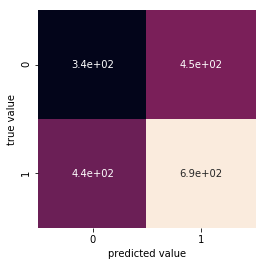

In [370]:
# Use our models to see the best score

# Uses decision tree
decision = DecisionTreeRegressor()
get_model(decision, X_train, y_train, X_test, y_test)

/home/abu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy score :  0.5583333333333333
mae score :  0.44166666666666665
Recall score   :  0.6248880931065354
classification report :
               precision    recall  f1-score   support

         0.0       0.47      0.47      0.47       803
         1.0       0.62      0.62      0.62      1117

   micro avg       0.56      0.56      0.56      1920
   macro avg       0.55      0.55      0.55      1920
weighted avg       0.56      0.56      0.56      1920



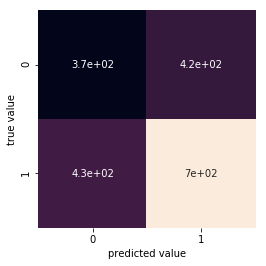

In [371]:
# RandomForest
rfc = RandomForestClassifier()
get_model(rfc, X_train, y_train, X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy score :  0.5984375
mae score :  0.4015625
Recall score   :  0.6229281767955801
classification report :
               precision    recall  f1-score   support

         0.0       0.31      0.52      0.39       472
         1.0       0.80      0.62      0.70      1448

   micro avg       0.60      0.60      0.60      1920
   macro avg       0.56      0.57      0.55      1920
weighted avg       0.68      0.60      0.62      1920



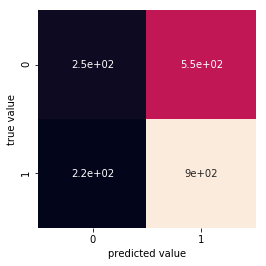

In [379]:
# XGb boost
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05,random_state=1,n_jobs=1)
get_model(xgb, X_train, y_train, X_test, y_test)

/home/abu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy score :  0.6307291666666667
mae score :  0.3692708333333333
Recall score   :  0.6242568370986921
classification report :
               precision    recall  f1-score   support

         0.0       0.20      0.68      0.31       238
         1.0       0.93      0.62      0.75      1682

   micro avg       0.63      0.63      0.63      1920
   macro avg       0.57      0.65      0.53      1920
weighted avg       0.84      0.63      0.69      1920



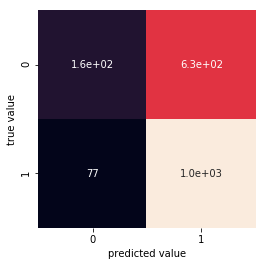

In [368]:

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

get_model(log, X_train, y_train, X_test, y_test)

In [357]:
# submission 